In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import xgboost as xgb

In [2]:
import pandas as pd
import sys

In [3]:
train=pd.read_csv(r'C:\Users\naveen chauhan\Desktop\mldata\mlp\black friday\train.csv')

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test=pd.read_csv(r'C:\Users\naveen chauhan\Desktop\mldata\mlp\black friday\test.csv')

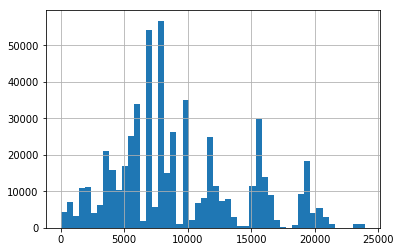

In [6]:
train.Purchase.hist(bins=50)

In [7]:
cutoff_purchase=np.percentile(train.Purchase,99.9)

In [8]:
test_user_id=test.User_ID.copy()
print(test_user_id.shape)

(233599,)


In [9]:
test_product_id=test.Product_ID.copy()

In [10]:
test_product_id.shape

(233599,)

In [11]:
train.loc[train.Purchase>cutoff_purchase,'Purchase']=cutoff_purchase

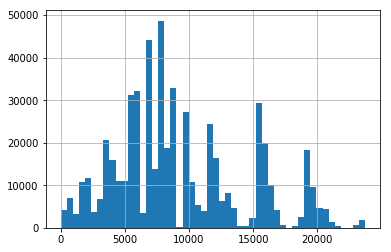

In [12]:
train.Purchase.hist(bins=50)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
train.User_ID=le.fit_transform(train.User_ID)
test.User_ID=le.transform(test.User_ID)

In [15]:
new_product_id=list(set(np.unique(test.Product_ID))-set(np.unique(train.Product_ID)))

In [16]:
print(new_product_id)

['P00239542', 'P00074942', 'P00092742', 'P00322842', 'P00315342', 'P00140842', 'P00056942', 'P00300142', 'P00105742', 'P00082642', 'P00156942', 'P00012642', 'P00253842', 'P00106242', 'P00309842', 'P00166542', 'P00322642', 'P00062542', 'P00270342', 'P00100242', 'P00030342', 'P00268942', 'P00077642', 'P00062242', 'P00359842', 'P00249942', 'P00312642', 'P00204642', 'P00172942', 'P00061642', 'P00038942', 'P00058842', 'P00039042', 'P00063942', 'P0099542', 'P00082142', 'P00336842', 'P00279042', 'P00013042', 'P00294942', 'P00168242', 'P00236842', 'P00306842', 'P00165542', 'P00227242', 'P00042642']


In [17]:
le=LabelEncoder()
train.Product_ID=le.fit_transform(train.Product_ID)

In [18]:
test.loc[test.Product_ID.isin(new_product_id),'Product_ID']=-1
new_product_id.append(-1)

In [19]:
test.loc[~test.Product_ID.isin(new_product_id),'Product_ID']=le.transform(test.loc[~test.Product_ID.isin(new_product_id),'Product_ID'])

In [20]:
y=train.Purchase

In [21]:
train.drop(['Purchase','Product_Category_2','Product_Category_3'],inplace=True,axis=1)

In [22]:
test.drop(['Product_Category_2','Product_Category_3'],inplace=True,axis=1)

In [23]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,0,672,F,0-17,10,A,2,0,3
1,0,2376,F,0-17,10,A,2,0,1
2,0,852,F,0-17,10,A,2,0,12
3,0,828,F,0-17,10,A,2,0,12
4,1,2734,M,55+,16,C,4+,0,8


In [24]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,3,1196,M,46-50,7,B,2,1,1
1,8,1043,M,26-35,17,C,0,0,3
2,9,2764,F,36-45,1,B,4+,1,5
3,9,1358,F,36-45,1,B,4+,1,4
4,10,529,F,26-35,1,C,1,0,4


In [25]:
train=pd.get_dummies(train)

In [26]:
train.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,672,10,0,3,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,2376,10,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,852,10,0,12,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,828,10,0,12,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,2734,16,0,8,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [27]:
test=pd.get_dummies(test)

In [28]:
test.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,3,1196,7,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,8,1043,17,0,3,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,9,2764,1,1,5,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,9,1358,1,1,4,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,10,529,1,0,4,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [29]:
#now we use xgboost for regression purpos and compute rmse
#Modelling
dtrain=xgb.DMatrix(train.values,label=y,missing=np.nan)

In [30]:
param={'onjective':'reg:linear','booster':'gbtree','silent':0,'max_depth':10,'eta':0.1,'subsample':0.8
       ,'colsample_bytree':0.8,'min_child_weight':20,'max_delta_step':0,'gamma':0}

In [31]:
num_round=690

In [34]:
seed= [1122, 2244, 3366, 4488, 5500]

In [36]:
test_preds = np.zeros((len(test), len(seed)))

In [37]:
#has taken approx 1 hr
for run in range(len(seed)):
    sys.stdout.write("\rXGB RUN:{}/{}".format(run+1, len(seed)))
    sys.stdout.flush()
    param['seed'] = seed[run]
    clf = xgb.train(param, dtrain, num_round)
    dtest = xgb.DMatrix(test.values,missing=np.nan)
    test_preds[:, run] = clf.predict(dtest)

XGB RUN:5/5

In [38]:
test_preds = np.mean(test_preds, axis=1)

In [41]:
submit = pd.DataFrame({'User_ID': test_user_id, 'Product_ID': test_product_id, 'Purchase': test_preds})
submit = submit[['User_ID', 'Product_ID', 'Purchase']]

submit.loc[submit['Purchase'] < 0, 'Purchase'] = 12  # changing min prediction to min value in train
submit.to_csv(r"C:\Users\naveen chauhan\Desktop\mldata\mlp\black friday\final_solution.csv", index=False)